## Dacon_AISR (Colab Demo)
---


**File Structure**


```
./Dacon_SR
├── inputs
│   ├── train
|   |   ├── hr
│   │   |   ├── 0000.png
│   │   |   ├── 0001.png
│   │   |   ├── 0002.png
|   |   |    ...
│   │   ├── lr
|   |       ├── 0000.png
|   |       ├── 0001.png
|   |       ├── 0002.png
|   |        ...
│   ├── test
│   │   ├── 20000.png
│   │   ├── 20001.png
│   │   ├── ...
├── tags
├── ...
├── weight
│   ├── net_g_905000.pth
```

Data는 inputs 폴더 안에<br>
weight는 weight 폴더 안에 넣어줌

In [ ]:
!nvidia-smi ## check GPU allocation

Fri Oct 14 01:15:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## mount google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### Installation

1. Clone repo

In [ ]:
!git clone https://github.com/Jinwoo1126/Dacon_SR.git
%cd Dacon_SR

Cloning into 'Dacon_SR'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 122 (delta 18), reused 120 (delta 16), pack-reused 0
Receiving objects: 100% (122/122), 4.41 MiB | 6.33 MiB/s, done.
Resolving deltas: 100% (18/18), done.
/content/Dacon_SR


2. Install dependent packages

In [ ]:
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# facexlib and gfpgan are for face enhancement
!pip install facexlib
!pip install gdown
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 172 kB 28.7 MB/s 
     |████████████████████████████████| 6.0 MB 59.0 MB/s 
     |████████████████████████████████| 190 kB 76.5 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214839 sha256=571cb169db19c82eacfb76e767e0f21cea7377ec5c56b2ddd628e8f3e9f255f2
  Stored in directory: /root/.cache/pip/wheels/2c/b3/4a/e2bc545f98417b6766ca50dd82b2a1f2b37780c68d41da9ca9
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 177 kB 59.6 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=3b82aa1274244af68fe197c74dde3accebc510fb3ae22c114ea0b2c3785d285d
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1

### Running Code

Get Pretrained Model

In [ ]:
## can download .pth file manually at https://drive.google.com/file/d/1piw_MOIE5bTH3-o9rmWqp3uIZoYcc5Wl/view
!gdown 1piw_MOIE5bTH3-o9rmWqp3uIZoYcc5Wl    #get pth file 
!mv net_g_905000.pth weights                #move pth file to weights folder

Downloading...
From: https://drive.google.com/uc?id=1piw_MOIE5bTH3-o9rmWqp3uIZoYcc5Wl
To: /content/Dacon_SR/net_g_905000.pth
100% 134M/134M [00:00<00:00, 176MB/s]


Get Image Files (Optional)

In [ ]:
## can download compressed img file manually at https://drive.google.com/file/d/17Ui8Pc6NiPTd6dBsZJr8XS4l9S9F-wyL/view
!gdown 17Ui8Pc6NiPTd6dBsZJr8XS4l9S9F-wyL    #get compressed img file(.zip)
!mv open.zip inputs                         #move zip file to inpus folder
!unzip inputs/open.zip -d inputs/           #unzip zip file

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=17Ui8Pc6NiPTd6dBsZJr8XS4l9S9F-wyL 

mv: cannot stat 'open.zip': No such file or directory
unzip:  cannot find or open inputs/open.zip, inputs/open.zip.zip or inputs/open.zip.ZIP.


Inference

In [ ]:
!python inference_rrdbnetrot.py --model_path=./weights/net_g_905000.pth --input=./inputs/test/lr --suffix=''

RRDBNetRot(
  (conv_first): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (body): Sequential(
    (0): RRDB(
      (rdb1): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv5): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
      )
      (rdb2): ResidualDenseBlock(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv2): Conv2d(96, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv3): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv4): Conv2d(160, 32, kernel_size=(3, 3), stride=(1, 1

### Visualization

Populating the interactive namespace from numpy and matplotlib


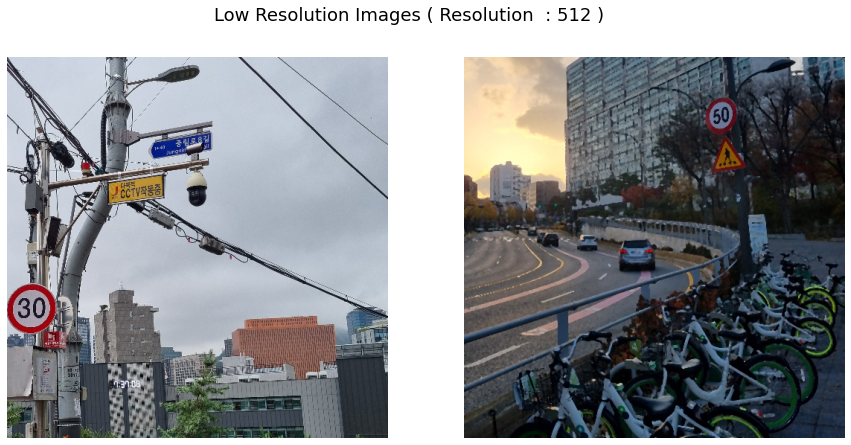

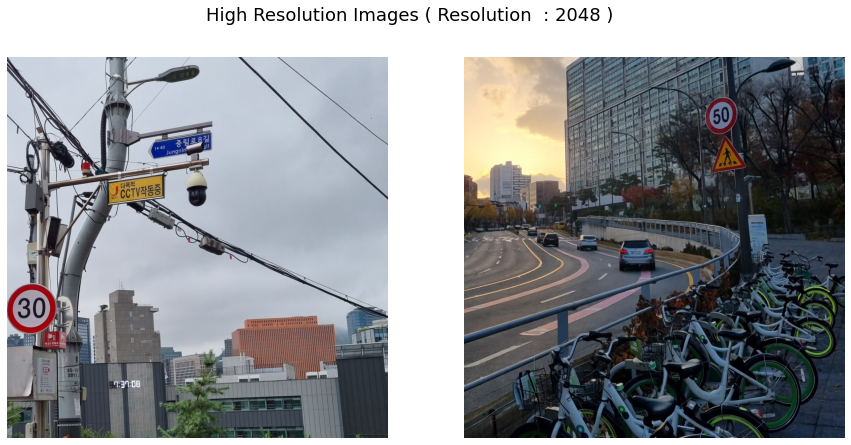

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

lr_path = r'./inputs/test/lr/'
hr_path = r'./results/'

lr_imgs = [os.path.join(lr_path,f) for f in os.listdir(lr_path)]
hr_imgs = [os.path.join(hr_path,f) for f in os.listdir(hr_path)]

sample = 2
size = 15

plt.figure(figsize = (size, size//sample))
plt.suptitle('Low Resolution Images ( Resolution  : 512 ) ', size = 18)

for idx in range(sample):
    plt.subplot(1,sample,idx+1)
    img = mpimg.imread(lr_imgs[idx])
    plt.imshow(img)
    plt.axis('off')

plt.show()

plt.figure(figsize = (size, size//sample))
plt.suptitle('High Resolution Images ( Resolution  : 2048 ) ', size = 18)

for idx in range(sample):
    plt.subplot(1,sample,idx+1)
    img = mpimg.imread(hr_imgs[idx])
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Submission

In [ ]:
import zipfile
import os
from os.path import basename

file_dir = r'./results'
sub_imgs = [os.path.join(os.path.abspath(file_dir),f) for f in  os.listdir(file_dir)]

os.makedirs('./submission', exist_ok=True)

submission = zipfile.ZipFile("./submission/submission.zip", 'w')
for imgs in sub_imgs:
    submission.write(imgs, basename(imgs))
submission.close()

print('Done.')

Done.


###(Optional) Finetuning with pretrained model

It is necessary to prepare data for training.

```
./Dacon_SR
├── inputs
│   ├── train
│   │   ├── 0000.png
│   │   ├── 0001.png
│   │   ├── 0002.png
│   │   ├── ...
```

**experiments result** :  `./experiments/[your experiments name(default='finetune_RealESRNetx4plus_400k_pairdata')]`


In [ ]:
!python realesrgan/train.py -opt options/finetune_realesrnet_x4plus_pairdata.yml

Disable distributed.
2022-10-14 02:50:08,981 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.4.2
	PyTorch: 1.12.1+cu113
	TorchVision: 0.13.1+cu113
2022-10-14 02:50:08,981 INFO: 
  name: finetune_RealESRNetx4plus_400k_pairdata
  model_type: RealESRNetModel
  scale: 4
  num_gpu: 1
  manual_seed: 0
  l1_gt_usm: True
  percep_gt_usm: True
  gan_gt_usm: False
  high_order_degradation: False
  datasets:[


## Code Description
---

주요 config 내용과 모델 등에 대한 설명입니다.

### configuration

(in `./options/finetune_realesrnet_x4plus_pairdata.yml`)

주요 options들은 다음과 같습니다.

- scale : 4            (512 -> 2048의 4배 scale)
- manual_seed : 0      (seed를 0으로 fix)
- gt_size : 512        (image patch size [default : 256])
- use_hflip : True     (Augmentation : hflip 수행)
- use_rot : True       (Augmentation : rotation 수행)
- num_feat : 64        (feature 갯수 높일수록 성능 향상 기대)

Optimizer              (Adam Optimizer 사용, Learning rate = 0.0004, beta값은 [0.9, 0.99])
- type: Adam
- lr: !!float 1e-4
- weight_decay: 0
- betas: [0.9, 0.99]

Scheduler              (200,000iter마다 gamma 값이 0.5씩 줄어들도록 decay 설정)
- type : MultiStepLR
- milestones : [200000]
- gamma : 0.5

Losses                 (MSELoss사용)
- type : MSELoss

<br>

```yaml

# general settings
name: finetune_RealESRNetx4plus_400k_pairdata
model_type: RealESRNetModel
scale: 4
num_gpu: auto
manual_seed: 0

# USM the ground-truth
l1_gt_usm: True
percep_gt_usm: True
gan_gt_usm: False

high_order_degradation: False # do not use the high-order degradation generation process

# dataset and data loader settings
datasets:

  train: # the 1st test dataset
    name: Dacon_train
    type: PairedImageDataset
    dataroot_gt: ./inputs/train/hr
    dataroot_lq: ./inputs/train/lr
    io_backend:
      type: disk

    gt_size: 512
    use_hflip: true
    use_rot: true

    # data loader
    use_shuffle: true
    num_worker_per_gpu: 4
    batch_size_per_gpu: 4
    dataset_enlarge_ratio: 1
    prefetch_mode: ~

# network structures
network_g:
  type: RRDBNet
  num_in_ch: 3
  num_out_ch: 3
  num_feat: 64
  num_block: 23
  num_grow_ch: 32

network_d:
  type: UNetDiscriminatorSN
  num_in_ch: 3
  num_feat: 64
  skip_connection: True

# path
path:
  # use the pre-trained Real-ESRNet model
  #pretrain_network_g: experiments/pretrained_models/RealESRGAN_x4plus.pth
  pretrain_network_g: ./weights/net_g_905000.pth
  param_key_g: params_ema
  strict_load_g: false
  resume_state: ~
  
# training settings
train:
  ema_decay: 0.999
  optim_g:
    type: Adam
    lr: !!float 1e-4
    weight_decay: 0
    betas: [0.9, 0.99]

  scheduler:
    type: MultiStepLR
    milestones: [400000]
    gamma: 0.5

  total_iter: 999999999
  warmup_iter: -1  # no warm up

  # losses
  pixel_opt:
    type: MSELoss
    loss_weight: 1.0
    reduction: mean

# validation settings
val:
  val_freq: !!float 5e3
  save_img: false
  pbar: False

  metrics:
    psnr:
      type: calculate_psnr
      crop_border: 4
      test_y_channel: true
      better: higher  # the higher, the better. Default: higher
    ssim:
      type: calculate_ssim
      crop_border: 4
      test_y_channel: true
      better: higher  # the higher, the better. Default: higher

# logging settings
logger:
  print_freq: 100
  save_checkpoint_freq: !!float 5e3
  use_tb_logger: true
  wandb:
    project: ~
    resume_id: ~

# dist training settings
dist_params:
  backend: nccl
  port: 29500

```

---

### RRDBNet Model(Training)

(in `basicsr/archs/rrdbnet_arch.py`)

- **ResidualDenseBlock** : RRDB를 구성하는 Densly Convolution Block
- **RRDB** : RRDBNet의 Body부분 [ResidualDenseBlock]으로 구성된 Residual in Residual Dense Block
- **RRDBNet** : RRDBNet구성 (pdf의 architecture 참조)

<br>

```python
import torch
from torch import nn as nn
from torch.nn import functional as F

from basicsr.utils.registry import ARCH_REGISTRY
from .arch_util import default_init_weights, make_layer, pixel_unshuffle


class ResidualDenseBlock(nn.Module):
    """Residual Dense Block.

    Used in RRDB block in ESRGAN.

    Args:
        num_feat (int): Channel number of intermediate features.
        num_grow_ch (int): Channels for each growth.
    """

    def __init__(self, num_feat=64, num_grow_ch=32):
        super(ResidualDenseBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_feat, num_grow_ch, 3, 1, 1)
        self.conv2 = nn.Conv2d(num_feat + num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv3 = nn.Conv2d(num_feat + 2 * num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv4 = nn.Conv2d(num_feat + 3 * num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv5 = nn.Conv2d(num_feat + 4 * num_grow_ch, num_feat, 3, 1, 1)

        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

        # initialization
        default_init_weights([self.conv1, self.conv2, self.conv3, self.conv4, self.conv5], 0.1)

    def forward(self, x):
        x1 = self.lrelu(self.conv1(x))
        x2 = self.lrelu(self.conv2(torch.cat((x, x1), 1)))
        x3 = self.lrelu(self.conv3(torch.cat((x, x1, x2), 1)))
        x4 = self.lrelu(self.conv4(torch.cat((x, x1, x2, x3), 1)))
        x5 = self.conv5(torch.cat((x, x1, x2, x3, x4), 1))
        # Empirically, we use 0.2 to scale the residual for better performance
        return x5 * 0.2 + x


class RRDB(nn.Module):
    """Residual in Residual Dense Block.

    Used in RRDB-Net in ESRGAN.

    Args:
        num_feat (int): Channel number of intermediate features.
        num_grow_ch (int): Channels for each growth.
    """

    def __init__(self, num_feat, num_grow_ch=32):
        super(RRDB, self).__init__()
        self.rdb1 = ResidualDenseBlock(num_feat, num_grow_ch)
        self.rdb2 = ResidualDenseBlock(num_feat, num_grow_ch)
        self.rdb3 = ResidualDenseBlock(num_feat, num_grow_ch)

    def forward(self, x):
        out = self.rdb1(x)
        out = self.rdb2(out)
        out = self.rdb3(out)
        # Empirically, we use 0.2 to scale the residual for better performance
        return out * 0.2 + x


@ARCH_REGISTRY.register()
class RRDBNet(nn.Module):
    """Networks consisting of Residual in Residual Dense Block, which is used
    in ESRGAN.

    ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks.

    We extend ESRGAN for scale x2 and scale x1.
    Note: This is one option for scale 1, scale 2 in RRDBNet.
    We first employ the pixel-unshuffle (an inverse operation of pixelshuffle to reduce the spatial size
    and enlarge the channel size before feeding inputs into the main ESRGAN architecture.

    Args:
        num_in_ch (int): Channel number of inputs.
        num_out_ch (int): Channel number of outputs.
        num_feat (int): Channel number of intermediate features.
            Default: 64
        num_block (int): Block number in the trunk network. Defaults: 23
        num_grow_ch (int): Channels for each growth. Default: 32.
    """

    def __init__(self, num_in_ch, num_out_ch, scale=4, num_feat=64, num_block=23, num_grow_ch=32):
        super(RRDBNet, self).__init__()
        self.scale = scale
        if scale == 2:
            num_in_ch = num_in_ch * 4
        elif scale == 1:
            num_in_ch = num_in_ch * 16
        self.conv_first = nn.Conv2d(num_in_ch, num_feat, 3, 1, 1)
        self.body = make_layer(RRDB, num_block, num_feat=num_feat, num_grow_ch=num_grow_ch)
        self.conv_body = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        # upsample
        self.conv_up1 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_up2 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_hr = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_last = nn.Conv2d(num_feat, num_out_ch, 3, 1, 1)

        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

    def forward(self, x):
        if self.scale == 2:
            feat = pixel_unshuffle(x, scale=2)
        elif self.scale == 1:
            feat = pixel_unshuffle(x, scale=4)
        else:
            feat = x
        feat = self.conv_first(feat)
        body_feat = self.conv_body(self.body(feat))
        feat = feat + body_feat
        # upsample
        feat = self.lrelu(self.conv_up1(F.interpolate(feat, scale_factor=2, mode='nearest')))
        feat = self.lrelu(self.conv_up2(F.interpolate(feat, scale_factor=2, mode='nearest')))
        out = self.conv_last(self.lrelu(self.conv_hr(feat)))
        return out
```

---

### RRDBNetrot Model(Inference)

(in `./archs/rrdbnetrot_arch.py`)

- **ResidualDenseBlock** : RRDB를 구성하는 Densly Convolution Block
- **RRDB** : RRDBNet의 Body부분 [ResidualDenseBlock]으로 구성된 Residual in Residual Dense Block
- **RRDBRot** : Network에 flip, rotation이 적용된 image를 통과 시킨 후 이들의 위치를 원래대로 맞춘 후 평균을 취하여 output return

<br>

큰 구조는 RRDBNet과 같으며 차이점은 RRDBRot 클래스에서 flip & rotation된 image를 사용한다는 점이 있습니다.

```python
import torch
from torch import nn as nn
from torch.nn import functional as F

from basicsr.utils.registry import ARCH_REGISTRY
from basicsr.archs.arch_util import default_init_weights, make_layer, pixel_unshuffle


class ResidualDenseBlock(nn.Module):
    """Residual Dense Block.
    Used in RRDB block in ESRGAN.
    Args:
        num_feat (int): Channel number of intermediate features.
        num_grow_ch (int): Channels for each growth.
    """

    def __init__(self, num_feat=64, num_grow_ch=32):
        super(ResidualDenseBlock, self).__init__()
        self.conv1 = nn.Conv2d(num_feat, num_grow_ch, 3, 1, 1)
        self.conv2 = nn.Conv2d(num_feat + num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv3 = nn.Conv2d(num_feat + 2 * num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv4 = nn.Conv2d(num_feat + 3 * num_grow_ch, num_grow_ch, 3, 1, 1)
        self.conv5 = nn.Conv2d(num_feat + 4 * num_grow_ch, num_feat, 3, 1, 1)

        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

        # initialization
        default_init_weights([self.conv1, self.conv2, self.conv3, self.conv4, self.conv5], 0.1)

    def forward(self, x):
        x1 = self.lrelu(self.conv1(x))
        x2 = self.lrelu(self.conv2(torch.cat((x, x1), 1)))
        x3 = self.lrelu(self.conv3(torch.cat((x, x1, x2), 1)))
        x4 = self.lrelu(self.conv4(torch.cat((x, x1, x2, x3), 1)))
        x5 = self.conv5(torch.cat((x, x1, x2, x3, x4), 1))
        # Empirically, we use 0.2 to scale the residual for better performance
        return x5 * 0.2 + x


class RRDB(nn.Module):
    """Residual in Residual Dense Block.
    Used in RRDB-Net in ESRGAN.
    Args:
        num_feat (int): Channel number of intermediate features.
        num_grow_ch (int): Channels for each growth.
    """

    def __init__(self, num_feat, num_grow_ch=32):
        super(RRDB, self).__init__()
        self.rdb1 = ResidualDenseBlock(num_feat, num_grow_ch)
        self.rdb2 = ResidualDenseBlock(num_feat, num_grow_ch)
        self.rdb3 = ResidualDenseBlock(num_feat, num_grow_ch)

    def forward(self, x):
        out = self.rdb1(x)
        out = self.rdb2(out)
        out = self.rdb3(out)
        # Empirically, we use 0.2 to scale the residual for better performance
        return out * 0.2 + x


@ARCH_REGISTRY.register()
class RRDBNetRot(nn.Module):
    """Networks consisting of Residual in Residual Dense Block, which is used
    in ESRGAN.
    ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks.
    We extend ESRGAN for scale x2 and scale x1.
    Note: This is one option for scale 1, scale 2 in RRDBNet.
    We first employ the pixel-unshuffle (an inverse operation of pixelshuffle to reduce the spatial size
    and enlarge the channel size before feeding inputs into the main ESRGAN architecture.
    Args:
        num_in_ch (int): Channel number of inputs.
        num_out_ch (int): Channel number of outputs.
        num_feat (int): Channel number of intermediate features.
            Default: 64
        num_block (int): Block number in the trunk network. Defaults: 23
        num_grow_ch (int): Channels for each growth. Default: 32.
    """

    def __init__(self, num_in_ch, num_out_ch, scale=4, num_feat=64, num_block=23, num_grow_ch=32):
        super(RRDBNetRot, self).__init__()
        self.scale = scale
        if scale == 2:
            num_in_ch = num_in_ch * 4
        elif scale == 1:
            num_in_ch = num_in_ch * 16
        self.conv_first = nn.Conv2d(num_in_ch, num_feat, 3, 1, 1)
        self.body = make_layer(RRDB, num_block, num_feat=num_feat, num_grow_ch=num_grow_ch)
        self.conv_body = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        # upsample
        self.conv_up1 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_up2 = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_hr = nn.Conv2d(num_feat, num_feat, 3, 1, 1)
        self.conv_last = nn.Conv2d(num_feat, num_out_ch, 3, 1, 1)

        self.lrelu = nn.LeakyReLU(negative_slope=0.2, inplace=True)

    def _forward(self, x):
        if self.scale == 2:
            feat = pixel_unshuffle(x, scale=2)
        elif self.scale == 1:
            feat = pixel_unshuffle(x, scale=4)
        else:
            feat = x
        feat = self.conv_first(feat)
        body_feat = self.conv_body(self.body(feat))
        feat = feat + body_feat
        # upsample
        feat = self.lrelu(self.conv_up1(F.interpolate(feat, scale_factor=2, mode='nearest')))
        feat = self.lrelu(self.conv_up2(F.interpolate(feat, scale_factor=2, mode='nearest')))
        out = self.conv_last(self.lrelu(self.conv_hr(feat)))
        return out
    
    def _get_rotateds(self, x):
        x90 = torch.rot90(x, k=1, dims=(2, 3))
        x180 = torch.rot90(x, k=2, dims=(2, 3))
        x270 = torch.rot90(x, k=3, dims=(2, 3))
        x_flip = torch.flip(x, dims=(3,))
        x_flip90 = torch.rot90(x_flip, k=1, dims=(2, 3))
        x_flip180 = torch.rot90(x_flip, k=2, dims=(2, 3))
        x_flip270 = torch.rot90(x_flip, k=3, dims=(2, 3))
        return (x, x90, x180, x270, x_flip, x_flip90, x_flip180, x_flip270)
       
    def _get_derotateds(self, xs):
        x, x90, x180, x270, x_flip, x_flip90, x_flip180, x_flip270 = xs
        x90 = torch.rot90(x90, k=3, dims=(2, 3))
        x180 = torch.rot90(x180, k=2, dims=(2, 3))
        x270 = torch.rot90(x270, k=1, dims=(2, 3))
        x_flip = torch.flip(x_flip, dims=(3,))
        x_flip90 = torch.rot90(x_flip90, k=3, dims=(2, 3))
        x_flip90 = torch.flip(x_flip90, dims=(3,))
        x_flip180 = torch.rot90(x_flip180, k=2, dims=(2, 3))
        x_flip180 = torch.flip(x_flip180, dims=(3,))
        x_flip270 = torch.rot90(x_flip270, k=1, dims=(2, 3))
        x_flip270 = torch.flip(x_flip270, dims=(3,))
        return (x, x90, x180, x270, x_flip, x_flip90, x_flip180, x_flip270)
        
    def forward(self, x):
        xs = self._get_rotateds(x)
        ys = []
        for x in xs:
            y = self._forward(x)
            ys.append(y)
        ys = self._get_derotateds(ys)
        ys = torch.stack(ys, dim=0)
        y = torch.mean(ys, dim=0)
        return y
```

---

### Training

(in `./realesrgan/train.py`)

기본 학습구조는 basicsr의 train_pipeline를 따름

``` python
# flake8: noqa
import os.path as osp
from basicsr.train import train_pipeline

import realesrgan.archs
import realesrgan.data
import realesrgan.models

if __name__ == '__main__':
    root_path = osp.abspath(osp.join(__file__, osp.pardir, osp.pardir))
    train_pipeline(root_path)
```

(in `basicsr/train.py` :: 91 [train_pipeline function 참고])

---

### Inference

큰 틀은 다음과 같습니다.

model 호출 -> upsampler 생성 -> RRDBNetrot 수행

``` python
# :: 71
model = RRDBNetRot(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)

# :: 106
upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=dni_weight,
        model=model,
        tile=args.tile,
        tile_pad=args.tile_pad,
        pre_pad=args.pre_pad,
        half=not args.fp32,
        gpu_id=args.gpu_id)

# :: 148
output, _ = upsampler.enhance(img, outscale=args.outscale)
``` 

이 점에 참고하시어 보시면 큰 틀을 이해하시는데 문제 없으실 것 같습니다.

<br>

(in `./inference_rrdbnetrot.py`)

``` python
import argparse
import cv2
import glob
import os
import numpy as np
from basicsr.utils.download_util import load_file_from_url

from realesrgan import RealESRGANer
from realesrgan.archs.rrdbnetrot_arch import RRDBNetRot

def main():
    """Inference demo for Real-ESRGAN.
    """
    parser = argparse.ArgumentParser()
    parser.add_argument('-i', '--input', type=str, default='inputs', help='Input image or folder')
    parser.add_argument(
        '-n',
        '--model_name',
        type=str,
        default='RealESRGAN_x4plus',
        help=('Model names: RealESRGAN_x4plus | RealESRNet_x4plus'))
    parser.add_argument('-o', '--output', type=str, default='results', help='Output folder')
    parser.add_argument(
        '-dn',
        '--denoise_strength',
        type=float,
        default=0.5,
        help=('Denoise strength. 0 for weak denoise (keep noise), 1 for strong denoise ability. '
              'Only used for the realesr-general-x4v3 model'))
    parser.add_argument('-s', '--outscale', type=float, default=4, help='The final upsampling scale of the image')
    parser.add_argument(
        '--model_path', type=str, default=None, help='[Option] Model path. Usually, you do not need to specify it')
    parser.add_argument('--suffix', type=str, default='out', help='Suffix of the restored image')
    parser.add_argument('-t', '--tile', type=int, default=0, help='Tile size, 0 for no tile during testing')
    parser.add_argument('--tile_pad', type=int, default=10, help='Tile padding')
    parser.add_argument('--pre_pad', type=int, default=0, help='Pre padding size at each border')
    parser.add_argument('--face_enhance', action='store_true', help='Use GFPGAN to enhance face')
    parser.add_argument(
        '--fp32', action='store_true', help='Use fp32 precision during inference. Default: fp16 (half precision).')
    parser.add_argument(
        '--alpha_upsampler',
        type=str,
        default='realesrgan',
        help='The upsampler for the alpha channels. Options: realesrgan | bicubic')
    parser.add_argument(
        '--ext',
        type=str,
        default='auto',
        help='Image extension. Options: auto | jpg | png, auto means using the same extension as inputs')
    parser.add_argument(
        '-g', '--gpu-id', type=int, default=None, help='gpu device to use (default=None) can be 0,1,2 for multi-gpu')

    args = parser.parse_args()

    # determine models according to model names
    args.model_name = args.model_name.split('.')[0]
    if args.model_name == 'RealESRGAN_x4plus':  # x4 RRDBNet model
        #model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
        model = RRDBNetRot(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth']
    elif args.model_name == 'RealESRNet_x4plus':  # x4 RRDBNet model
        model = RRDBNetRot(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
        netscale = 4
        file_url = ['https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.1/RealESRNet_x4plus.pth']

    # determine model paths
    if args.model_path is not None:
        model_path = args.model_path
    else:
        model_path = os.path.join('weights', args.model_name + '.pth')
        if not os.path.isfile(model_path):
            ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
            for url in file_url:
                # model_path will be updated
                model_path = load_file_from_url(
                    url=url, model_dir=os.path.join(ROOT_DIR, 'weights'), progress=True, file_name=None)

    # use dni to control the denoise strength
    dni_weight = None
    if args.model_name == 'realesr-general-x4v3' and args.denoise_strength != 1:
        wdn_model_path = model_path.replace('realesr-general-x4v3', 'realesr-general-wdn-x4v3')
        model_path = [model_path, wdn_model_path]
        dni_weight = [args.denoise_strength, 1 - args.denoise_strength]

    print(model)

    # restorer
    upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=dni_weight,
        model=model,
        tile=args.tile,
        tile_pad=args.tile_pad,
        pre_pad=args.pre_pad,
        half=not args.fp32,
        gpu_id=args.gpu_id)

    os.makedirs(args.output, exist_ok=True)

    if os.path.isfile(args.input):
        paths = [args.input]
    else:
        paths = sorted(glob.glob(os.path.join(args.input, '*')))

    for idx, path in enumerate(paths):
        imgname, extension = os.path.splitext(os.path.basename(path))
        print('Testing', idx, imgname)

        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        
        if len(img.shape) == 3 and img.shape[2] == 4:
            img_mode = 'RGBA'
        else:
            img_mode = None

        try:
            output, _ = upsampler.enhance(img, outscale=args.outscale)
                
        except RuntimeError as error:
            print('Error', error)
            print('If you encounter CUDA out of memory, try to set --tile with a smaller number.')
        else:
            if args.ext == 'auto':
                extension = extension[1:]
            else:
                extension = args.ext
            if img_mode == 'RGBA':  # RGBA images should be saved in png format
                extension = 'png'
            if args.suffix == '':
                save_path = os.path.join(args.output, f'{imgname}.{extension}')
            else:
                save_path = os.path.join(args.output, f'{imgname}_{args.suffix}.{extension}')
            cv2.imwrite(save_path, output)


if __name__ == '__main__':
    main()
```

---